In [2]:
import matplotlib.pyplot as plt
import numpy as np

def display_grid(X):
    """
    Displays a grid based on the input matrix X.
    X: A numpy array with elements ranging between 0 and 1.
    """
    if not isinstance(X, np.ndarray):
        raise ValueError("X must be a numpy array")

    if X.min() < 0 or X.max() > 1:
        raise ValueError("Elements of X must be between 0 and 1")

    plt.imshow(X, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title("Grid Display")
    plt.show()

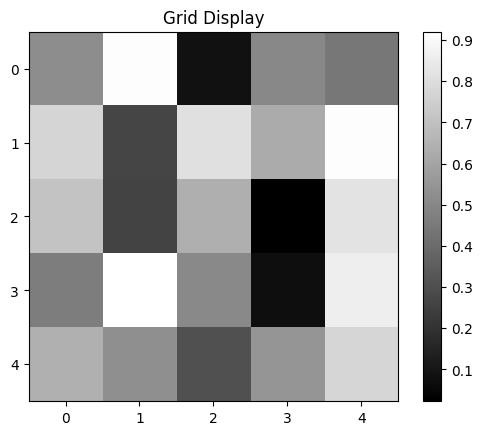

In [3]:
# Example usage
X = np.random.rand(5, 5)  # Creating a 5x5 matrix with random values between 0 and 1
display_grid(X)

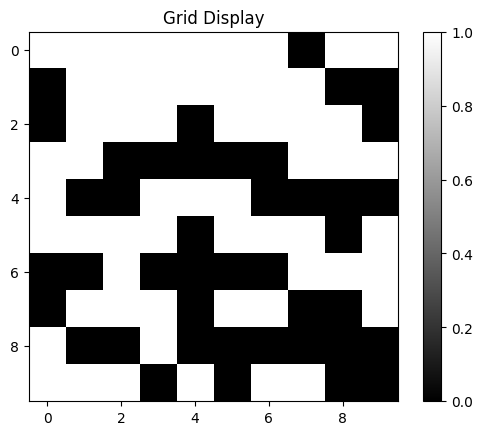

In [28]:
X = np.random.randint(2, size=(10, 10))
display_grid(X)

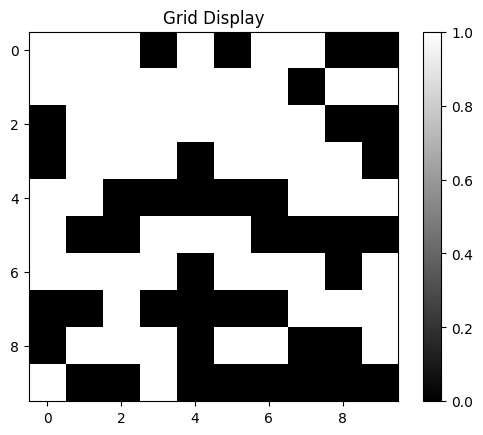

In [29]:
# Shift element of X on the y axis (lines) 
X = np.roll(X, 1, 0)
display_grid(X)

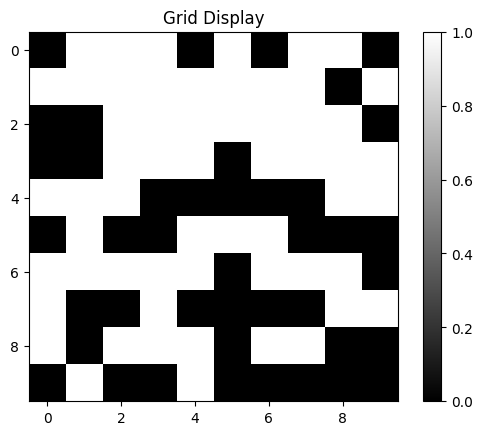

In [30]:
# Shift element of X on the x axis (columns) 
X = np.roll(X, 1, 1)
display_grid(X)

In [11]:
# The [np(roll(np.roll(...),...)) for i in (...) for j in (...) ...] is a list comprehension of matrice X.
# The sum compute the sum of each neighbor arounf each element (i,j) in X!

def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

In [40]:
# Thsi function does the same using a convolution function of a filter 3x3 of one.

def life_step_2(X):
    """Game of life step using scipy tools"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

In [ ]:
life_step = life_step_1

In [64]:
%matplotlib inline
%matplotlib notebook

In [68]:
from matplotlib import animation
from IPython.display import HTML

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 1., X.shape[0] * 1.)#(X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval, blit=True)

    return anim

In [70]:
np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
ani = life_animation(X, dpi=10, frames=40)

HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

/var/folders/27/_dtn7bb14_l33npcht3tcy6h0000gn/T/ipykernel_53395/3719263830.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)


In [72]:
X = np.zeros((17, 17))
X[2, 4:7] = 1
X[4:7, 7] = 1
X += X.T
X += X[:, ::-1]
X += X[::-1, :]
ani = life_animation(X, frames=6)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

/var/folders/27/_dtn7bb14_l33npcht3tcy6h0000gn/T/ipykernel_53395/3719263830.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
